In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/WHO-COVID-19-global-data.csv (1).zip")

# Show the first few rows
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [ ]:
df_india = df[df['Country'] == 'India'].copy()

# Show top 5 rows
display(df_india.head())

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
130944,2020-01-03,IN,India,SEARO,0,0,0,0
130945,2020-01-04,IN,India,SEARO,0,0,0,0
130946,2020-01-05,IN,India,SEARO,0,0,0,0
130947,2020-01-06,IN,India,SEARO,0,0,0,0
130948,2020-01-07,IN,India,SEARO,0,0,0,0


In [ ]:

# Convert date to datetime
df_india['Date_reported'] = pd.to_datetime(df_india['Date_reported'])

# Sort by date
df_india = df_india.sort_values('Date_reported')

# Reset index
df_india.reset_index(drop=True, inplace=True)

# View
df_india[['Date_reported', 'New_cases', 'Cumulative_cases']].tail()

,Date_reported,New_cases,Cumulative_cases
1359,2023-09-23,70,44998463
1360,2023-09-24,62,44998525
1361,2023-09-25,0,44998525
1362,2023-09-26,0,44998525
1363,2023-09-27,0,44998525


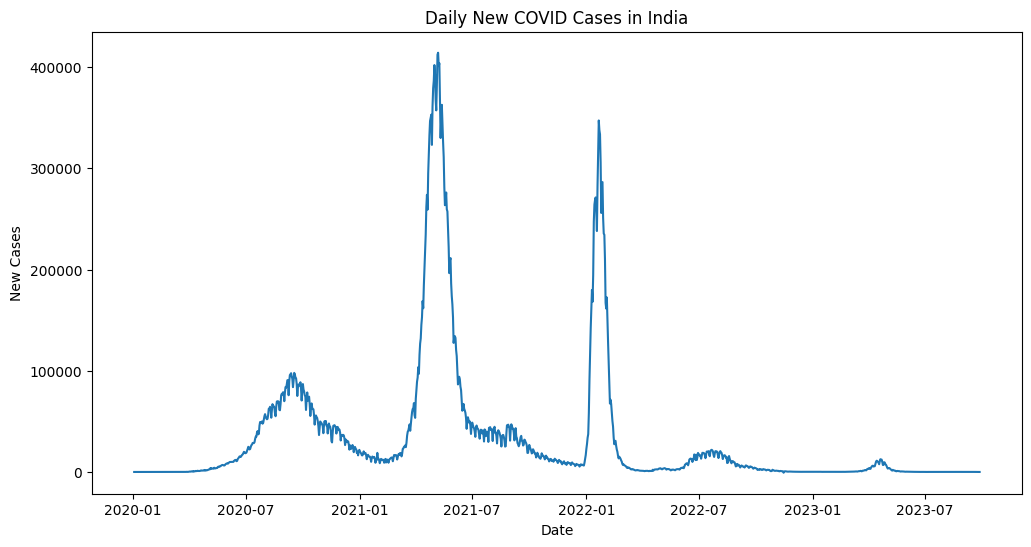

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=df_india, x='Date_reported', y='New_cases')
plt.title('Daily New COVID Cases in India')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

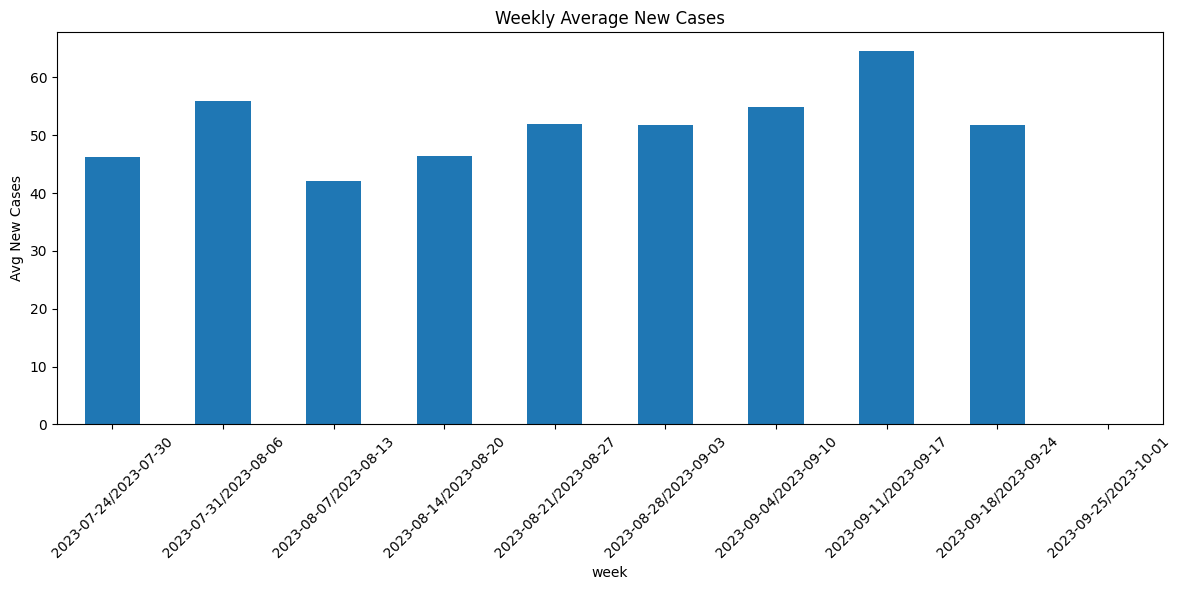

In [ ]:
# Add week column
df_india['week'] = df_india['Date_reported'].dt.to_period('W').astype(str)

# Group by week
weekly = df_india.groupby('week')['New_cases'].mean()

# Plot
weekly.tail(10).plot(kind='bar', figsize=(12,6), title='Weekly Average New Cases')
plt.ylabel("Avg New Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
scaled_cases = scaler.fit_transform(df_india[['Cumulative_cases']])

In [ ]:
def create_sequences(data, window_size=30):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(scaled_cases, window_size)

# Reshape input for LSTM: [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(window_size, 1)))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X, y, epochs=30, batch_size=16)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1366
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 2.6631e-04
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1.4925e-04
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 9.3138e-05
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1.0117e-04
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 9.7631e-05
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 8.1596e-05
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 7.1938e-05
Epoch 9/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 8.3462e-05
Epoch 10/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 7.9865e-05
Epoch 11/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 7.6386e-05
Epoch 12/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 7.8610e-05
Epoch 13/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 7.2610e-05
Epoch 14/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 7.3048e-05
Epoch 15/30
84/84 ━━━━━━━━━━━━

In [ ]:
# Start with last 30 known days
input_seq = scaled_cases[-window_size:].reshape(1, window_size, 1)
future_preds = []

# Predict 730 future values
for _ in range(730):
    pred = model.predict(input_seq)[0]
    future_preds.append(pred)
    input_seq = np.append(input_seq[:, 1:, :], [[pred]], axis=1)

# Inverse scale back to real case values
predicted_cases = scaler.inverse_transform(future_preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━

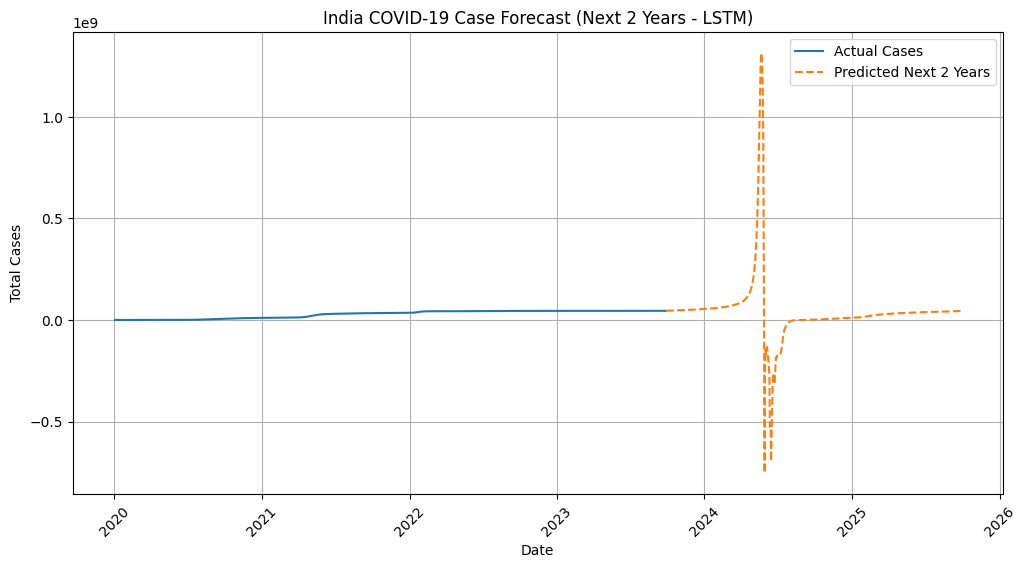

In [ ]:
import matplotlib.pyplot as plt

# Generate future dates
last_date = df_india['Date_reported'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=730)

# Build prediction DataFrame
df_forecast = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Cases': predicted_cases.flatten().astype(int)
})

# Plot actual + predicted
plt.figure(figsize=(12,6))
plt.plot(df_india['Date_reported'], df_india['Cumulative_cases'], label="Actual Cases")
plt.plot(df_forecast['Date'], df_forecast['Predicted_Cases'], label="Predicted Next 2 Years", linestyle='--')
plt.title("India COVID-19 Case Forecast (Next 2 Years - LSTM)")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()